In [1]:
import pyvisa as pv
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio   
import pickle
import scipy.signal
from tqdm.notebook import tqdm, trange
from scipy.special import erfc

from optic.comm.modulation import modulateGray, demodulateGray, GrayMapping
from optic.dsp.core import firFilter, pulseShape, lowPassFIR, pnorm, upsample
from optic.comm.metrics import signal_power
from optic.plot import eyediagram
plt.rcParams["figure.figsize"] = (12,6)


# funcoes
```text
[:SOURce[<n>]]:FUNCtion:SEQuence:LIST:CLEar (Limpa a memoria de waveforms) pg 110
[:SOURce[<n>]][:TRACe]:DATA:DAC16 (Manda uma sequencia de pontos arbitraria para o DAC) pg 155
```

In [20]:
# def Onda_Dac(DAC,Porta,fs,V_High,V_Low,pontos,filtro):
#     pontos = np.array2string(pontos, separator=', ').translate({ord(i): None for i in '[]'}).replace('\n','')

#     #DAC.write(f':SOURce{Porta}:FUNCtion:SEQuence:LIST:CLEar')
#     DAC.write(f':SOURce{Porta}:TRACe:DATA:DAC16 CODE,END, {pontos}')    
#     # DAC.write(f':SOURce{Porta}:FUNCtion:SEQuence:LIST:SRATe {fs}')
#     # DAC.write(f':SOURce{Porta}:FUNCtion:SEQuence:LIST:FILTer {filtro}')
#     # DAC.write(f':SOURce{Porta}:FUNCtion:SEQuence:LIST:APPLy')
#     # DAC.write(f':SOURce{Porta}:FUNCtion:SEQuence:STATe ON')
#     # DAC.write(f':SOURce{Porta}:VOLTage:HIGH {V_High}')
#     # DAC.write(f':SOURce{Porta}:VOLTage:LOW {V_Low}')

DAC = wfgen
Porta = 2
fs = 10000
V_High = 4
V_Low = 0 
pontos = np.linspace(-32000,32000,32,dtype = int)
filtro = 'NORMal'

Onda_Dac(DAC,Porta,fs,V_High,V_Low,pontos,filtro)

In [115]:
wfgen.write(':SOURce2:FUNCtion:SEQuence:LIST:CLEar')
wfgen.write(':SOURce2:TRACe:DATA:DAC16 CODE,END,10,10,32000,30,40,32000,60,70,80,32000,100,200,300,400,500,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000,32000')
wfgen.write(':SOURce2:FUNCtion:SEQuence:LIST:SRATe 100000')
wfgen.write(':SOURce2:FUNCtion:SEQuence:LIST:APPLy')
wfgen.write(':SOURce2:FUNCtion:SEQuence:STATe ON')

16384

231



37

In [248]:
def Gerar_Simbolos(M,nsimbolos,SPS,formatoPulso,nTaps,alpha):
    # Geração de simbolos
    bits = np.random.randint(0,2,int(nsimbolos*np.log2(M)))

    simbolos = modulateGray(bits, M, 'pam')
    simbolos = pnorm(simbolos)

    # Fomartação de pulso
    simbolosup = upsample(simbolos, SPS)
    pulso = pulseShape(formatoPulso, SPS, nTaps, alpha)
    pulso = pulso/max(abs(pulso))
    sinal = firFilter(pulso, simbolosup)
    sinal = sinal.real
    # if formatoPulso == 'rrc':
    #     np.savez('Dados Gerador De sinal/Python/{}PAM_SPS={}_{}_alpha={}.npz'.format(int(M),int(SPS),formatoPulso,alpha), simbolos=simbolos,sinal=sinal)
    # else:
    #     np.savez('Dados Gerador De sinal/Python/{}PAM_SPS={}_{}.npz'.format(int(M),int(SPS),formatoPulso), simbolos=simbolos,sinal=sinal)

    #npz = np.load('{}PAM_SPS={}_{}_aplha={}.npz'.format(int(M),int(SPS),formatoPulso,alpha))
    #print(npz['simbolos'])

    # Geração do arquivo do DAC
    sinal = sinal - np.min(sinal)
    sinal = sinal/np.max(sinal)*65534
    sinal = sinal - 32767
    sinal = (np.rint(sinal)).astype(int)
    return sinal

def Onda_Dac(DAC,Porta,fs,V_High,V_Low,pontos,Nome_Onda):
    DAC.write('SOURCE{}:DATA:VOLatile:CLEar')
    pontos = np.array2string(pontos, separator=', ').translate({ord(i): None for i in '[]'}).replace('\n','')
    DAC.write('SOURCE{}:DATA:ARB:DAC {}, {}'.format(Porta,Nome_Onda,pontos))    
    DAC.write('SOURCE{}:FUNC:ARB {}'.format(Porta,Nome_Onda))
    DAC.write('SOURCE{}:FUNC ARB'.format(Porta))
    DAC.write('SOURCE{}:FUNC:ARB:SRAT {}'.format(Porta,fs))
    DAC.write('SOURCE{}:VOLT:HIGH {}'.format(Porta,V_High))
    DAC.write('SOURCE{}:VOLT:LOW {}'.format(Porta,V_Low))
    DAC.write('OUTP{} ON'.format(Porta))
    DAC.write('DISPLAY:FOCUS CH{}'.format(Porta))

In [ ]:
rm.setdefault()

In [2]:
import pyvisa
rm = pyvisa.ResourceManager()
print(rm.list_resources())

# DAC = rm.open_resource('USB0::0x0957::0x5707::MY53802202::0::INSTR')
# print('Instrument info:', DAC.query('*IDN?'))

# DAC.write('*rst') # resets the instrument to default configuration
# DAC.write('*opc?') # waits until previous commands are finished

In [ ]:

DAC.write('SOURCE2:DATA:ARB: OI, #236{}'.format(pontos))    


In [182]:
pontos = np.append(simbolos,simbolos)
DAC.write('SOURce2:DATA:VOL:CLE')
DAC.query('*OPC?')
DAC.query('SOURce2:DATA:VOL:FREE?')

pontos = np.array2string(pontos, separator=',').translate({ord(i): None for i in '[]'}).replace('\n','')

DAC.write('SOURCE2:DATA:ARB:DAC OI, {}'.format(pontos))   

DAC.write('SOURCE2:FUNC ARB {}'.format('OI'))
DAC.write('SOURCE{}:FUNC ARB'.format(Porta))
DAC.write('SOURCE2:FUNC:ARB:SRAT {}'.format(fs))
DAC.write('SOURCE2:VOLT:HIGH {}'.format(V_High))
DAC.write('SOURCE2:VOLT:LOW {}'.format(V_Low))
DAC.write('OUTP2 ON'.format())
DAC.write('DISPLAY:FOCUS CH2'.format())
#len(pontos)

19

In [244]:
DAC.query('SOURce2:DATA:VOL:FREE?')

'+63940000\n'

+0,"No error"



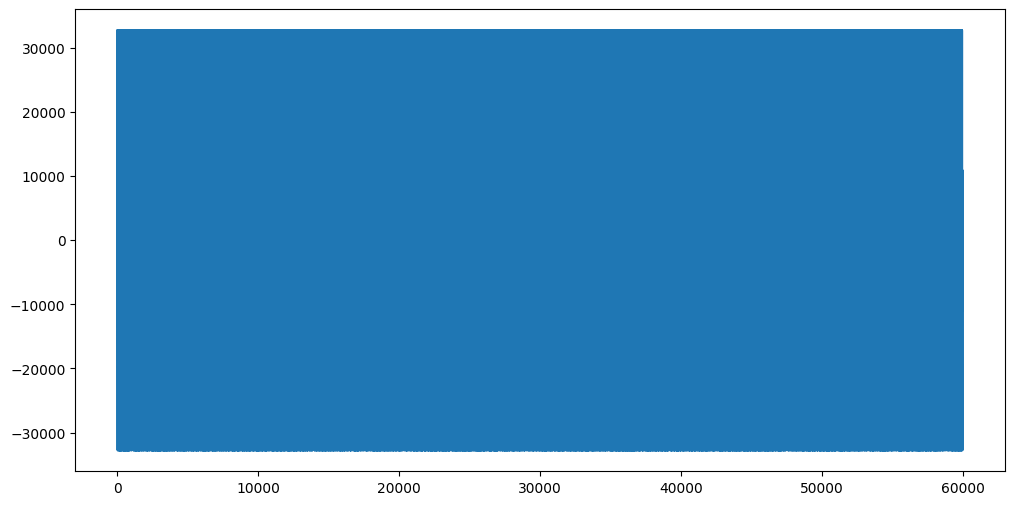

In [246]:
np.set_printoptions(threshold=np.inf)
del DAC.timeout
DAC.write('*CLS')
def Onda_Dac(DAC,Porta,fs,V_High,V_Low,pontos,Nome_Onda):
    pontos = ((np.array2string(pontos, separator=',').translate({ord(i): None for i in '[]'}).replace('\n',''))).replace(" ", "")
    DAC.write('SOURCE{}:DATA:ARB:DAC {},{}'.format(Porta,Nome_Onda,pontos))
    print(DAC.query('SYSTEM:ERROR?'))  
    DAC.query('*OPC?')  
    DAC.write('SOURCE{}:FUNC ARB'.format(Porta))
    DAC.write('SOURCE{}:FUNC:ARB {}'.format(Porta,Nome_Onda))
    DAC.write('SOURCE{}:FUNC:ARB:SRAT {}'.format(Porta,fs))
    DAC.write('SOURCE{}:VOLT:HIGH {}'.format(Porta,V_High))
    DAC.write('SOURCE{}:VOLT:LOW {}'.format(Porta,V_Low))
    DAC.write('OUTP{} ON'.format(Porta))
    DAC.write('DISPLAY:FOCUS CH{}'.format(Porta))

#wfgen.write('*rst') 

#Valores Geração do sinal
M = 4 # order of the modulation format
nsimbolos = 60000//4
SPS = 4
formatoPulso = 'nrz' #'rect','nrz','rrc'
nTaps = 1024
alpha = 0.1

simbolos = Gerar_Simbolos(M,nsimbolos,SPS,formatoPulso,nTaps,alpha)
#DAC.write('SOURce2:DATA:VOL:CLE')
#DAC.query('*OPC?')
#print(DAC.query('SOURce2:DATA:VOL:FREE?'))
plt.plot(simbolos)
#print(np.array2string(simbolos, separator=', ').translate({ord(i): None for i in '[]'}))
Porta = 2
fs = 1e8
V_High = 5.0
V_Low = -5
pontos = simbolos
Nome_Onda = 'a2'
for i in range(1):
    Onda_Dac(DAC,Porta,fs,V_High,V_Low,pontos,f'oi2')
#print(64000000-int(DAC.query('SOURce2:DATA:VOL:FREE?')))
#print(DAC.query('SOURce2:DATA:VOLatile:CATalog?'))


In [ ]:
pl

In [169]:
int(DAC.query('SOURce2:DATA:VOL:FREE?'))

62992000

In [153]:
simbolos = (np.linspace(-32000,32000,100)).astype(int)
DAC.write('SOURce2:DATA:VOL:CLE')
DAC.query('*OPC?')
print(DAC.query('SOURce2:DATA:VOL:FREE?'))

+64000000



In [46]:
DAC.write('DATA:VOLatile:CLEar')

21

In [352]:
wfgen.write('*rst') # resets the instrument to default configuration

# Parameters of a square wave

wfgen.write('DATA:VOLatile:CLEar')

#wfgen.write('SOURCE2:DATA:ARB:DAC teste,-10922,  10922,  32767,  32767, -10922, -32767,  10922,  32767,  32767,10922, -32767, -32767, -32767,  32767,  10922, -10922,  10922,  32767,10922, -10922, -32767,  32767,  10922,  32767, -32767,  32767, -32767,-32767, -32767, -10922,  10922, -10922, -32767, -10922,  32767,  32767,10922,  10922, -10922,  10922, -10922, -10922,  32767, -32767,  32767,-10922, -32767,  10922, -32767,  10922, -10922, -10922, -10922, -10922,32767, -10922, -32767, -10922, -32767, -10922, -32767,  32767,  32767,-10922')
wfgen.write('SOURCE2:DATA:ARB:DAC teste, 10922,  10922,  10922, -10922, -10922, -10922, -32767,  32767, -10922,  32767, -10922, -32767,  10922, -10922,  10922, -10922, -10922,  32767,  32767,  32767,  10922, -10922, -32767, -32767, -10922, -32767,  32767,  10922,  10922, -10922,  10922,  32767,  10922,  10922,  10922,  10922,  32767,  32767, -32767, -32767,  32767, -10922,  10922,  10922, -10922, -10922, -32767, -10922, -10922, -32767, -32767,  32767, -10922,  10922, -32767,  32767, -32767,  32767, -32767, -10922,  32767,  32767, -32767,  32767')
#wfgen.write('SOURCE2:DATA:ARB:DAC teste,-32767, 32767,  32767,32767,-32767,32767,-32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767,32767')
wfgen.write('SOURCE2:FUNC:ARB teste')
#print(wfgen.query('DATA:ATTR:AVER? teste'))


wfgen.write('SOURCE2:FUNC ARB')
wfgen.write('SOURCE2:FREQ +1E+05')
wfgen.write('SOURCE2:FUNC:SQU:DCYC +20')
wfgen.write('SOURCE2:VOLT:HIGH +2.0')
wfgen.write('SOURCE2:VOLT:LOW 0')
wfgen.write('OUTP2 ON')

wfgen.write('DISPLAY:FOCUS CH2')

19

In [323]:
wfgen.write('DISPLAY:FOCUS CH2')

19

In [273]:
wfgen.write('DATA:VOLatile:CLEar')

wfgen.write('SOURCE2:DATA:ARB teste,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0')
print(wfgen.query('SYSTem:ERRor?'))
wfgen.write('SOURCE2:FUNC:ARB teste')

print(wfgen.query('SYSTem:ERRor?'))
print(wfgen.query('SOURCE2:FUNC:ARB?'))

+0,"No error"

+0,"No error"

"TESTE"



In [249]:
wfgen.write('SOURCE2:FUNC SIN')
wfgen.write('FUNC:ARB teste')
wfgen.write('SOURCE2:FUNC ARB')

18

In [204]:
wfgen.write('MMEM:LOAD:DATA "EXP_RISE.arb"')
print(wfgen.query('SYSTem:ERRor?'))

-257,"File name error; invalid character in name"



In [200]:
#wfgen.write('DATA:VOLatile:CLEar')
#wfgen.write('DISPLAY:FOCUS CH2')
#wfgen.write('DATA:ARB:DAC teste,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0')
#wfgen.write('FUNC:ARB teste')
#wfgen.write('MMEM:STORE:DATA "INT:\teste.arb"')
wfgen.write('DATA:VOLatile:CLEar')
wfgen.write('MMEM:LOAD:DATA "INT:\teste.arb"')
print(wfgen.query('SYSTem:ERRor?'))
#wfgen.write('FUNC ARB')
#wfgen.write('FUNC:ARB "INT:\teste.arb"')
#print(wfgen.query('SYSTem:ERRor?'))
#wfgen.write('SOURCE2:FUNC ARB ')

-257,"File name error; invalid character in name"



In [182]:
wfgen.write('MMEM:CAT?')    

11

In [118]:
np.linspace(-32000,32000,1000).astype(int)

array([-32000, -31935, -31871, -31807, -31743, -31679, -31615, -31551,
       -31487, -31423, -31359, -31295, -31231, -31167, -31103, -31039,
       -30974, -30910, -30846, -30782, -30718, -30654, -30590, -30526,
       -30462, -30398, -30334, -30270, -30206, -30142, -30078, -30014,
       -29949, -29885, -29821, -29757, -29693, -29629, -29565, -29501,
       -29437, -29373, -29309, -29245, -29181, -29117, -29053, -28988,
       -28924, -28860, -28796, -28732, -28668, -28604, -28540, -28476,
       -28412, -28348, -28284, -28220, -28156, -28092, -28028, -27963,
       -27899, -27835, -27771, -27707, -27643, -27579, -27515, -27451,
       -27387, -27323, -27259, -27195, -27131, -27067, -27003, -26938,
       -26874, -26810, -26746, -26682, -26618, -26554, -26490, -26426,
       -26362, -26298, -26234, -26170, -26106, -26042, -25977, -25913,
       -25849, -25785, -25721, -25657, -25593, -25529, -25465, -25401,
       -25337, -25273, -25209, -25145, -25081, -25017, -24952, -24888,
      

In [206]:
wfgen.write('DISPLAY:TEXT:CLEAR')
#wfgen.write('DISPLAY:TEXT "DAC HACKEADO"')

20

In [106]:
DAC.close()
rm.close()
